### Decision Tree Classifier

> A fresh look on our favorite upside-down tree

A **Decision Tree classifier** creates an upside-down tree to make predictions, starting at the top with a question about an important feature in your data, then branches out based on the answers. As you follow these branches down, each stop asks another question, narrowing down the possibilities.

In [1]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

# Preprocess data
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Reorder the columns
df = df[['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']]

# Prepare features and target
X, y = df.drop(columns='Play'), df['Play']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Display results
print(pd.concat([X_train, y_train], axis=1), '\n')
print(pd.concat([X_test, y_test], axis=1))

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
0       1         0      0         85.0      85.0     0     0
1       1         0      0         80.0      90.0     1     0
2       0         1      0         83.0      78.0     0     1
3       0         0      1         70.0      96.0     0     1
4       0         0      1         68.0      80.0     0     1
5       0         0      1         65.0      70.0     1     0
6       0         1      0         64.0      65.0     1     1
7       1         0      0         72.0      95.0     0     0
8       1         0      0         69.0      70.0     0     1
9       0         0      1         75.0      80.0     0     1
10      1         0      0         75.0      70.0     1     1
11      0         1      0         72.0      90.0     1     1
12      0         1      0         81.0      75.0     0     1
13      0         0      1         71.0      80.0     1     0 

    sunny  overcast  rainy  Temperature  Humidity  Wind  Play
14    

#### Main Mechanism

The Decision Tree classifier operates by recursively splitting the data based on the most informative features.

1. Start with the entire dataset at the root node.
2. Select the best feature to split the data (based on measures like Gini impurity).
3. Create child nodes for each possible value of the selected feature.
4. Repeat steps 2–3 for each child node until a stopping criterion is met (e.g., maximum depth reached, minimum samples per leaf, or pure leaf nodes).
5. Assign the majority class to each leaf node.

In [2]:
def potential_split_points(attr_name, attr_values):
    sorted_attr = np.sort(attr_values)
    unique_values = np.unique(sorted_attr)
    split_points = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values) - 1)]
    return {attr_name: split_points}

# Calculate and display potential split points for all columns
for column in X_train.columns:
    splits = potential_split_points(column, X_train[column])
    for attr, points in splits.items():
        print(f"{attr:11}: {points}")

sunny      : [np.float64(0.5)]
overcast   : [np.float64(0.5)]
rainy      : [np.float64(0.5)]
Temperature: [np.float64(64.5), np.float64(66.5), np.float64(68.5), np.float64(69.5), np.float64(70.5), np.float64(71.5), np.float64(73.5), np.float64(77.5), np.float64(80.5), np.float64(82.0), np.float64(84.0)]
Humidity   : [np.float64(67.5), np.float64(72.5), np.float64(76.5), np.float64(79.0), np.float64(82.5), np.float64(87.5), np.float64(92.5), np.float64(95.5)]
Wind       : [np.float64(0.5)]


In [3]:
def gini_impurity(y):
    p = np.bincount(y) / len(y)
    return 1 - np.sum(p**2)

def weighted_average_impurity(y, split_index):
    n = len(y)
    left_impurity = gini_impurity(y[:split_index])
    right_impurity = gini_impurity(y[split_index:])
    return (split_index * left_impurity + (n - split_index) * right_impurity) / n

# Sort 'sunny' feature and corresponding labels
sunny = X_train['sunny']
sorted_indices = np.argsort(sunny)
sorted_sunny = sunny.iloc[sorted_indices]
sorted_labels = y_train.iloc[sorted_indices]

# Find split index for 0.5
split_index = np.searchsorted(sorted_sunny, 0.5, side='right')

# Calculate impurity
impurity = weighted_average_impurity(sorted_labels, split_index)

print(f"Weighted average impurity for 'sunny' at split point 0.5: {impurity:.3f}")

Weighted average impurity for 'sunny' at split point 0.5: 0.394


In [4]:
def calculate_split_impurities(X, y):
    split_data = []
    
    for feature in X.columns:
        sorted_indices = np.argsort(X[feature])
        sorted_feature = X[feature].iloc[sorted_indices]
        sorted_y = y.iloc[sorted_indices]
        
        unique_values = sorted_feature.unique()
        split_points = (unique_values[1:] + unique_values[:-1]) / 2
        
        for split in split_points:
            split_index = np.searchsorted(sorted_feature, split, side='right')
            impurity = weighted_average_impurity(sorted_y, split_index)
            split_data.append({
                'feature': feature,
                'split_point': split,
                'weighted_avg_impurity': impurity
            })
    
    return pd.DataFrame(split_data)

# Calculate split impurities for all features
calculate_split_impurities(X_train, y_train).round(3)

,feature,split_point,weighted_avg_impurity
0,sunny,0.5,0.394
1,overcast,0.5,0.357
2,rainy,0.5,0.457
3,Temperature,64.5,0.440
4,Temperature,66.5,0.452
5,Temperature,68.5,0.459
6,Temperature,69.5,0.450
7,Temperature,70.5,0.432
8,Temperature,71.5,0.458
9,Temperature,73.5,0.458


In [5]:
# Calculate split impurities forselected index
selected_index = [4,8,3,13,7,9,10] # Change it depending on which indices you want to check
calculate_split_impurities(X_train.iloc[selected_index], y_train.iloc[selected_index]).round(3)

,feature,split_point,weighted_avg_impurity
0,sunny,0.5,0.405
1,rainy,0.5,0.405
2,Temperature,68.5,0.381
3,Temperature,69.5,0.343
4,Temperature,70.5,0.286
5,Temperature,71.5,0.405
6,Temperature,73.5,0.343
7,Humidity,75.0,0.343
8,Humidity,87.5,0.371
9,Humidity,95.5,0.381


In [6]:
from sklearn.tree import DecisionTreeClassifier

# The whole Training Phase above is done inside sklearn like this
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

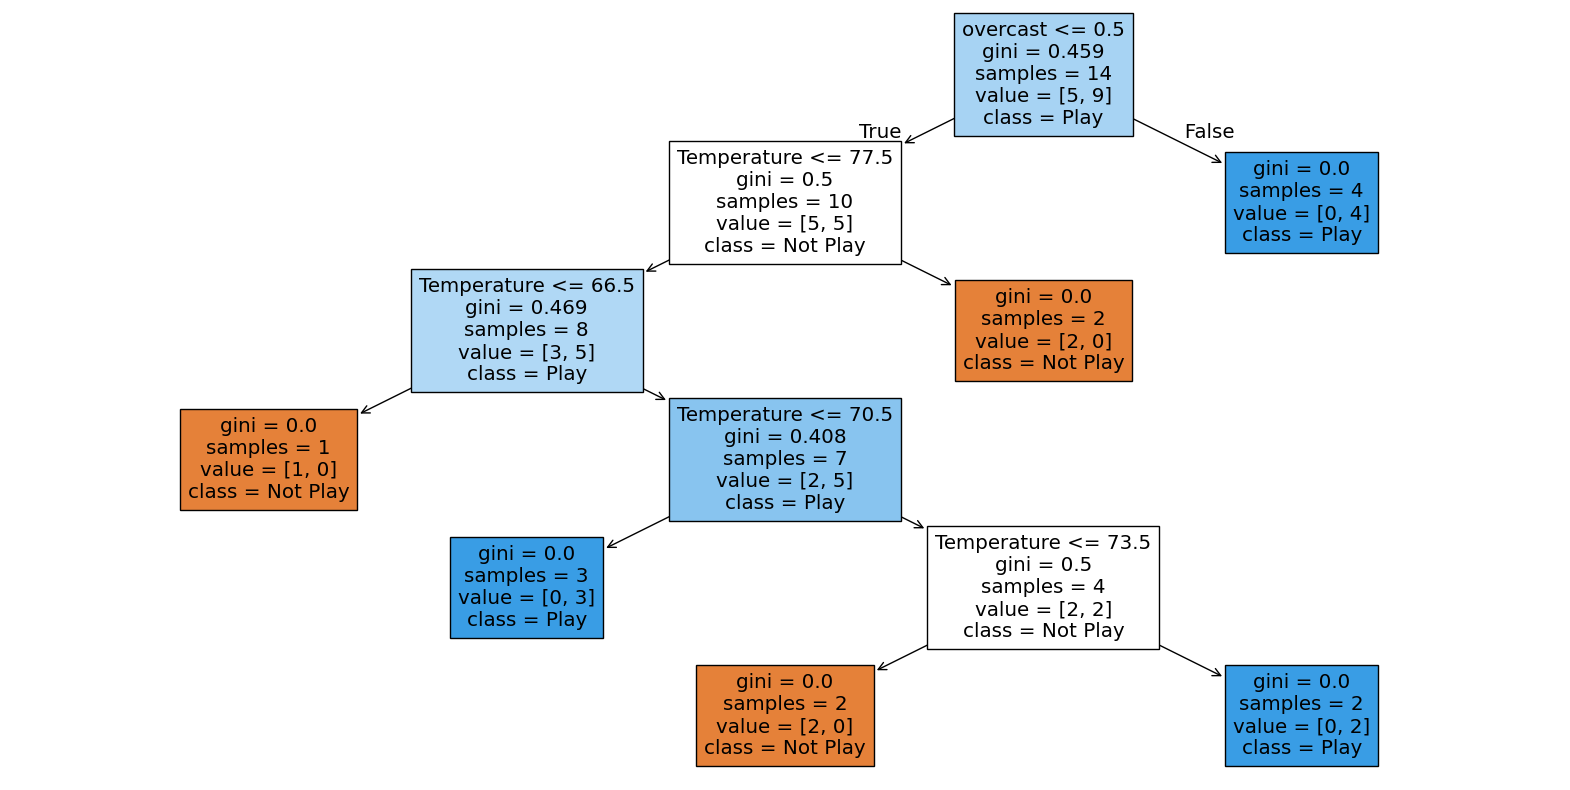

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['Not Play', 'Play'])
plt.show()

In [8]:
# Make predictions
y_pred = dt_clf.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 0 0 1 0 1 0 1]


In [9]:
# Evaluate the classifier
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7142857142857143


Decision Trees have several important parameters that control their growth and complexity:

1. **Max Depth**: This sets the maximum depth of the tree, which can be a valuable tool in preventing overfitting.

👍 *Helpful Tip*: Consider starting with a shallow tree (perhaps 3–5 levels deep) and gradually increasing the depth.


2. **Min Samples Split**: This parameter determines the minimum number of samples needed to split an internal node.

👍 *Helpful Tip*: Setting this to a higher value (around 5–10% of your training data) can help prevent the tree from creating too many small, specific splits that might not generalize well to new data.

3. **Min Samples Leaf**: This specifies the minimum number of samples required at a leaf node.

👍 *Helpful Tip*: Choose a value that ensures each leaf represents a meaningful subset of your data (approximately 1–5% of your training data). This can help avoid overly specific predictions.

4. **Criterion**: The function used to measure the quality of a split (usually “gini” for Gini impurity or “entropy” for information gain).

👍 *Helpful Tip*: While Gini is generally simpler and faster to compute, entropy often performs better for multi-class problems. That said, they frequently give similar results.

Accuracy: 0.7142857142857143


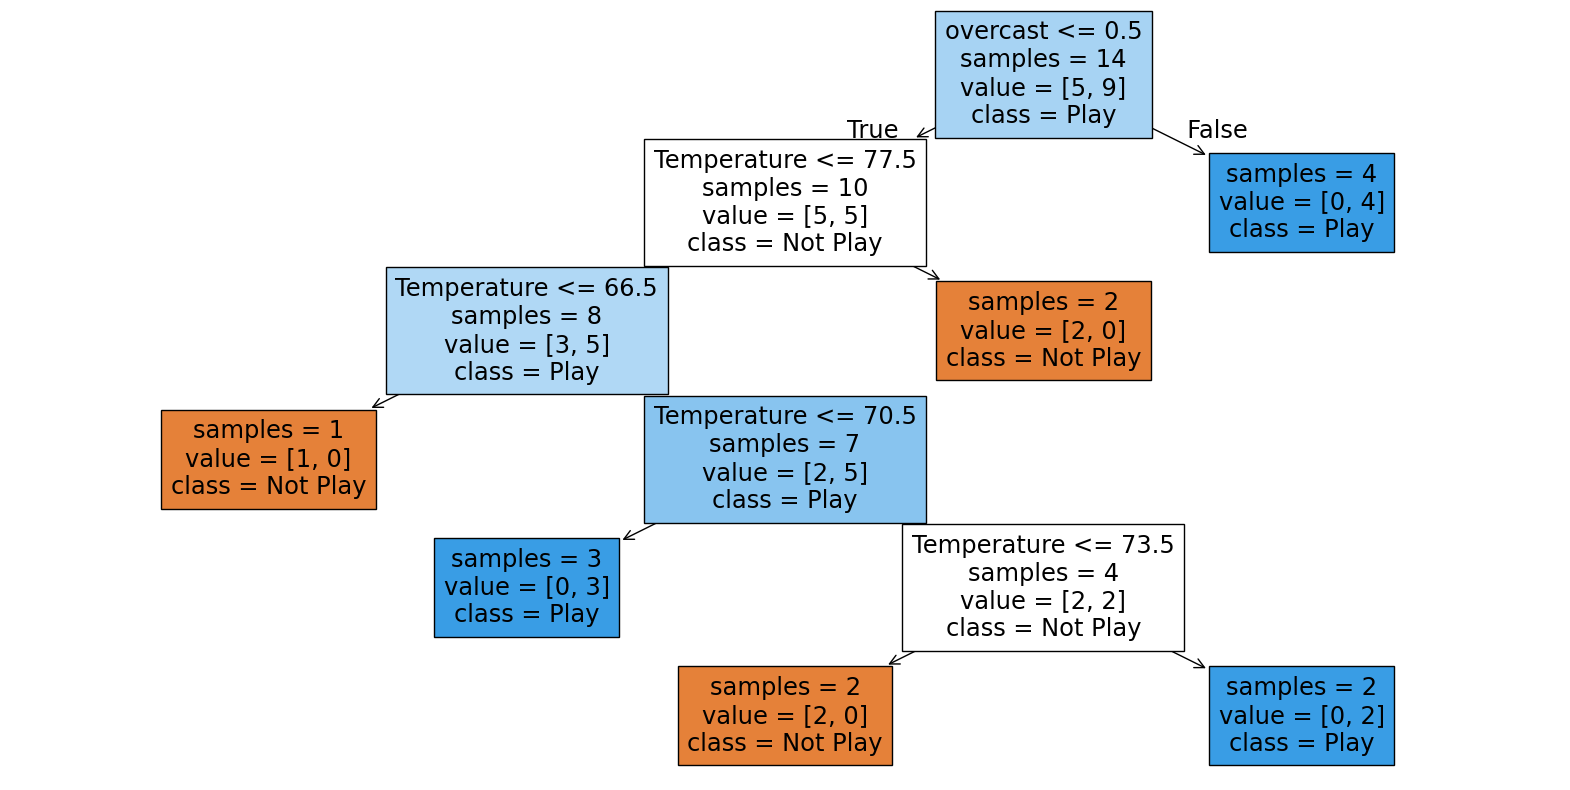

In [10]:
dt_clf = DecisionTreeClassifier(
    max_depth=None,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()

#### Pros:

- **Interpretability**: Easy to understand and visualize the decision-making process.

- **No Feature Scaling**: Can handle both numerical and categorical data without normalization.

- **Handles Non-linear Relationships**: Can capture complex patterns in the data.

- **Feature Importance**: Provides a clear indication of which features are most important for prediction.


#### Cons:

- **Overfitting**: Prone to creating overly complex trees that don’t generalize well, especially with small datasets.

- **Instability**: Small changes in the data can result in a completely different tree being generated.

- **Biased with Imbalanced Datasets**: Can be biased towards dominant classes.

- **Inability to Extrapolate**: Cannot make predictions beyond the range of the training data.